# K- Nearest Neighbors

[Prashant Brahmbhatt](https://www.github.com/hashbanger)

___

The k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression:

### The imports

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Getting the data

For this illustration we will use the **Social_Network_ads** data which shows which users were influenced by ads on social media and purchased the product.

In [47]:
dataset = pd.read_csv("Social_Network_Ads.csv")
dataset.head(20)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


We will here use the two columns **Age** and **Estimated Salary** to classify the **Purchased** lables.  

In [56]:
# Selecting the feature columns
X = dataset.iloc[:, [2,3]].values

# Selecting the training labels
y =dataset.iloc[:, 4]

Splitting the train and test data in 75% to 25%.

In [35]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

The KNN Algorithm uses instance based learning. It believes that the closer an instance is to a group the more is the confidence that it belongs to it rather than some other group. We can also rephrase it as the more a kind of samples are in the instance's neighbourhood the more it is likely to be similar to them.  
We use a distance measure to choose the nearest points.  
The number of points that we will consider is value of $K$. The different values of K can vary our results many times.

![knn](knn.png)

In [36]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### Fitting the model

For the distance metric we will use the **Minkowski** distance metric.  
![mink](mikowski.png)

In [63]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric= 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

$p = 1$ signifies **Manhatten Distance** while $p =2$ signifies the standard **Euclidean Distance**

#### The prediction

In [64]:
y_pred = classifier.predict(X_test)

Forming the confusion matrix. We use confusion matrix to judge our classification results based on   
**True Positives, true Negatives, False Positives, False Negatives.**
![cm](cm.png)

In [65]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y_test)
print(cm)

[[64  3]
 [ 4 29]]


So we have got   
**64 + 29 = 93**   correct predictions and  
**4 + 3 = 7**    incorrect prediction.

___

### Visualizations

Let's visualize our results for the **Training Set** First

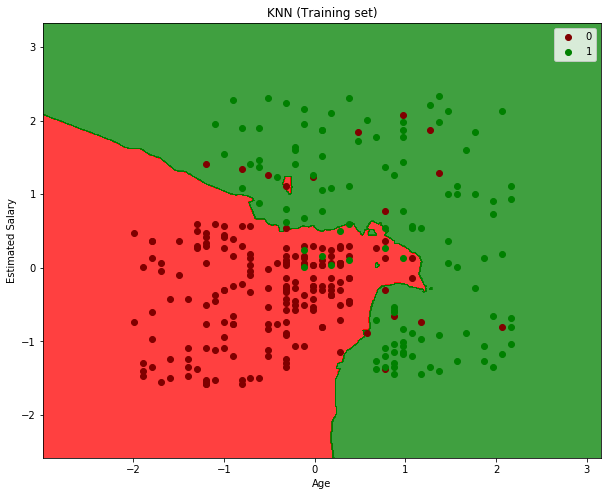

In [58]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
plt.figure(figsize=(10,8))

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('maroon', 'green'))(i), label = j)


plt.title('KNN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In the above plot the **Red** points show the customers who have not bought the product while **Green** shows the one that did buy.  
The red points which lie in the red area are the ones which are correctly classified ( as 0) and same for the green points that lie in the green area.  
The misfit points are the wrongly classified points.  
But still we have got a pretty good accuracy!

For the **Test Set**

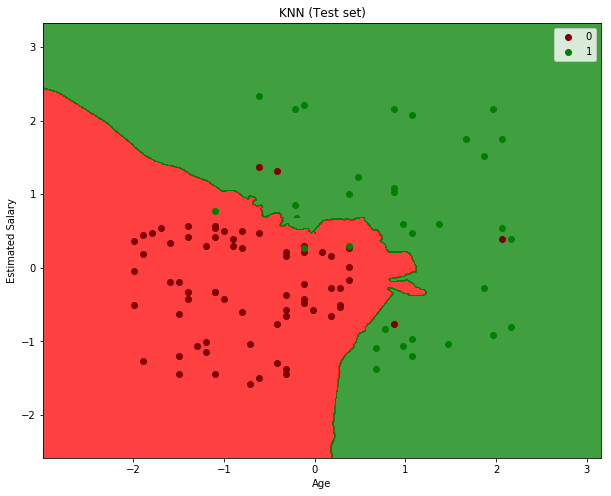

In [76]:
from matplotlib.colors import ListedColormap
plt.figure(figsize=(10,8))

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('maroon', 'green'))(i), label = j)
plt.title('KNN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### The Smoothing Factor

The value of K also effects the classification boundary. The boundary smoothens more with the increasing value of considered neighbors $K$ as it becomes less specific to noise.

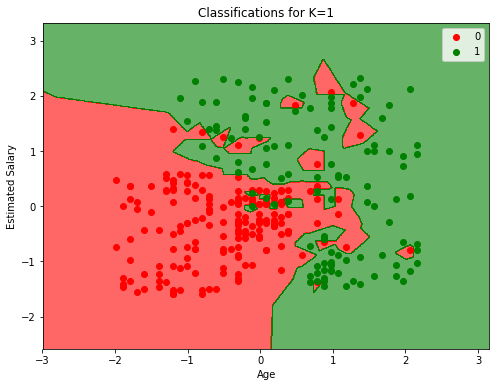

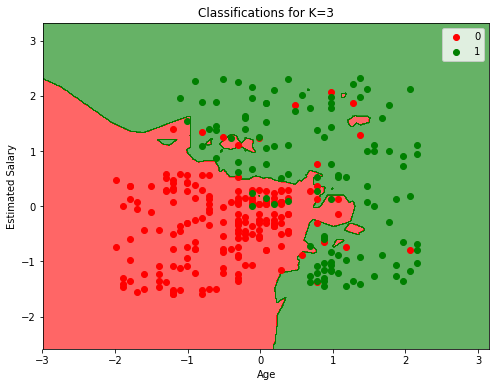

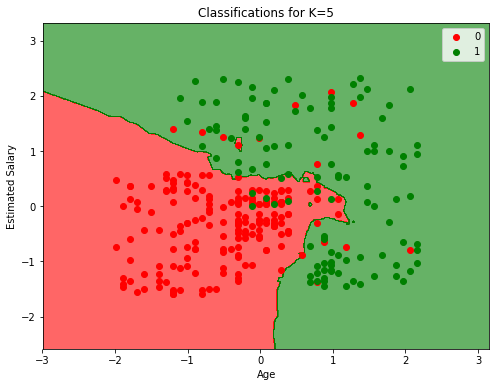

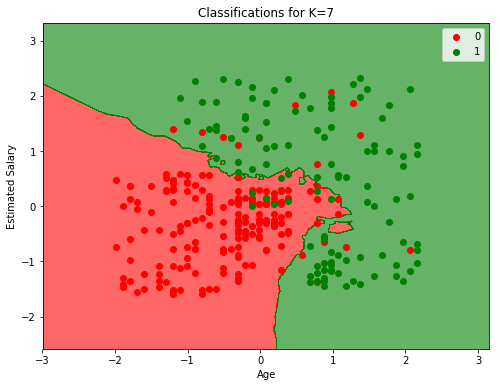

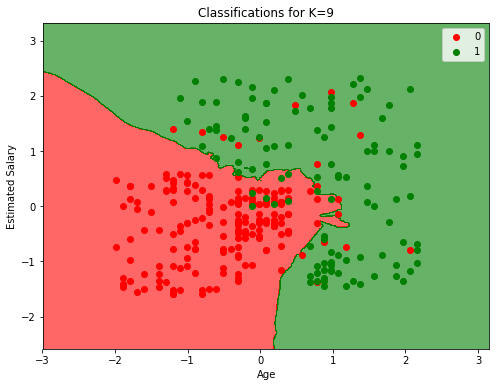

In [114]:
from sklearn.neighbors import KNeighborsClassifier
for nbh in range(1,10, 2):
    classifier = KNeighborsClassifier(n_neighbors = nbh, metric= 'minkowski', p = 2)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    from matplotlib.colors import ListedColormap
    plt.figure(figsize=(8,6))

    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.60, cmap = ListedColormap(('red', 'green')))

    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    
    plt.title('Classifications for K={}'.format(nbh))
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

### de nada!